In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

d_norse = np.loadtxt("lif_norse.csv", delimiter=",")
d_spin = np.loadtxt("lif_spinnaker2.csv", delimiter=",")

v_norse = d_norse[:, 1]
v_spin = d_spin[:, 1]

st_norse = np.where(d_norse[:, 2] == 1)[0]
st_spin = np.where(d_spin[:, 2] == 1)[0]

## 2D comparison plot

TODO: visualize spike timing difference (absolute difference and ISI)

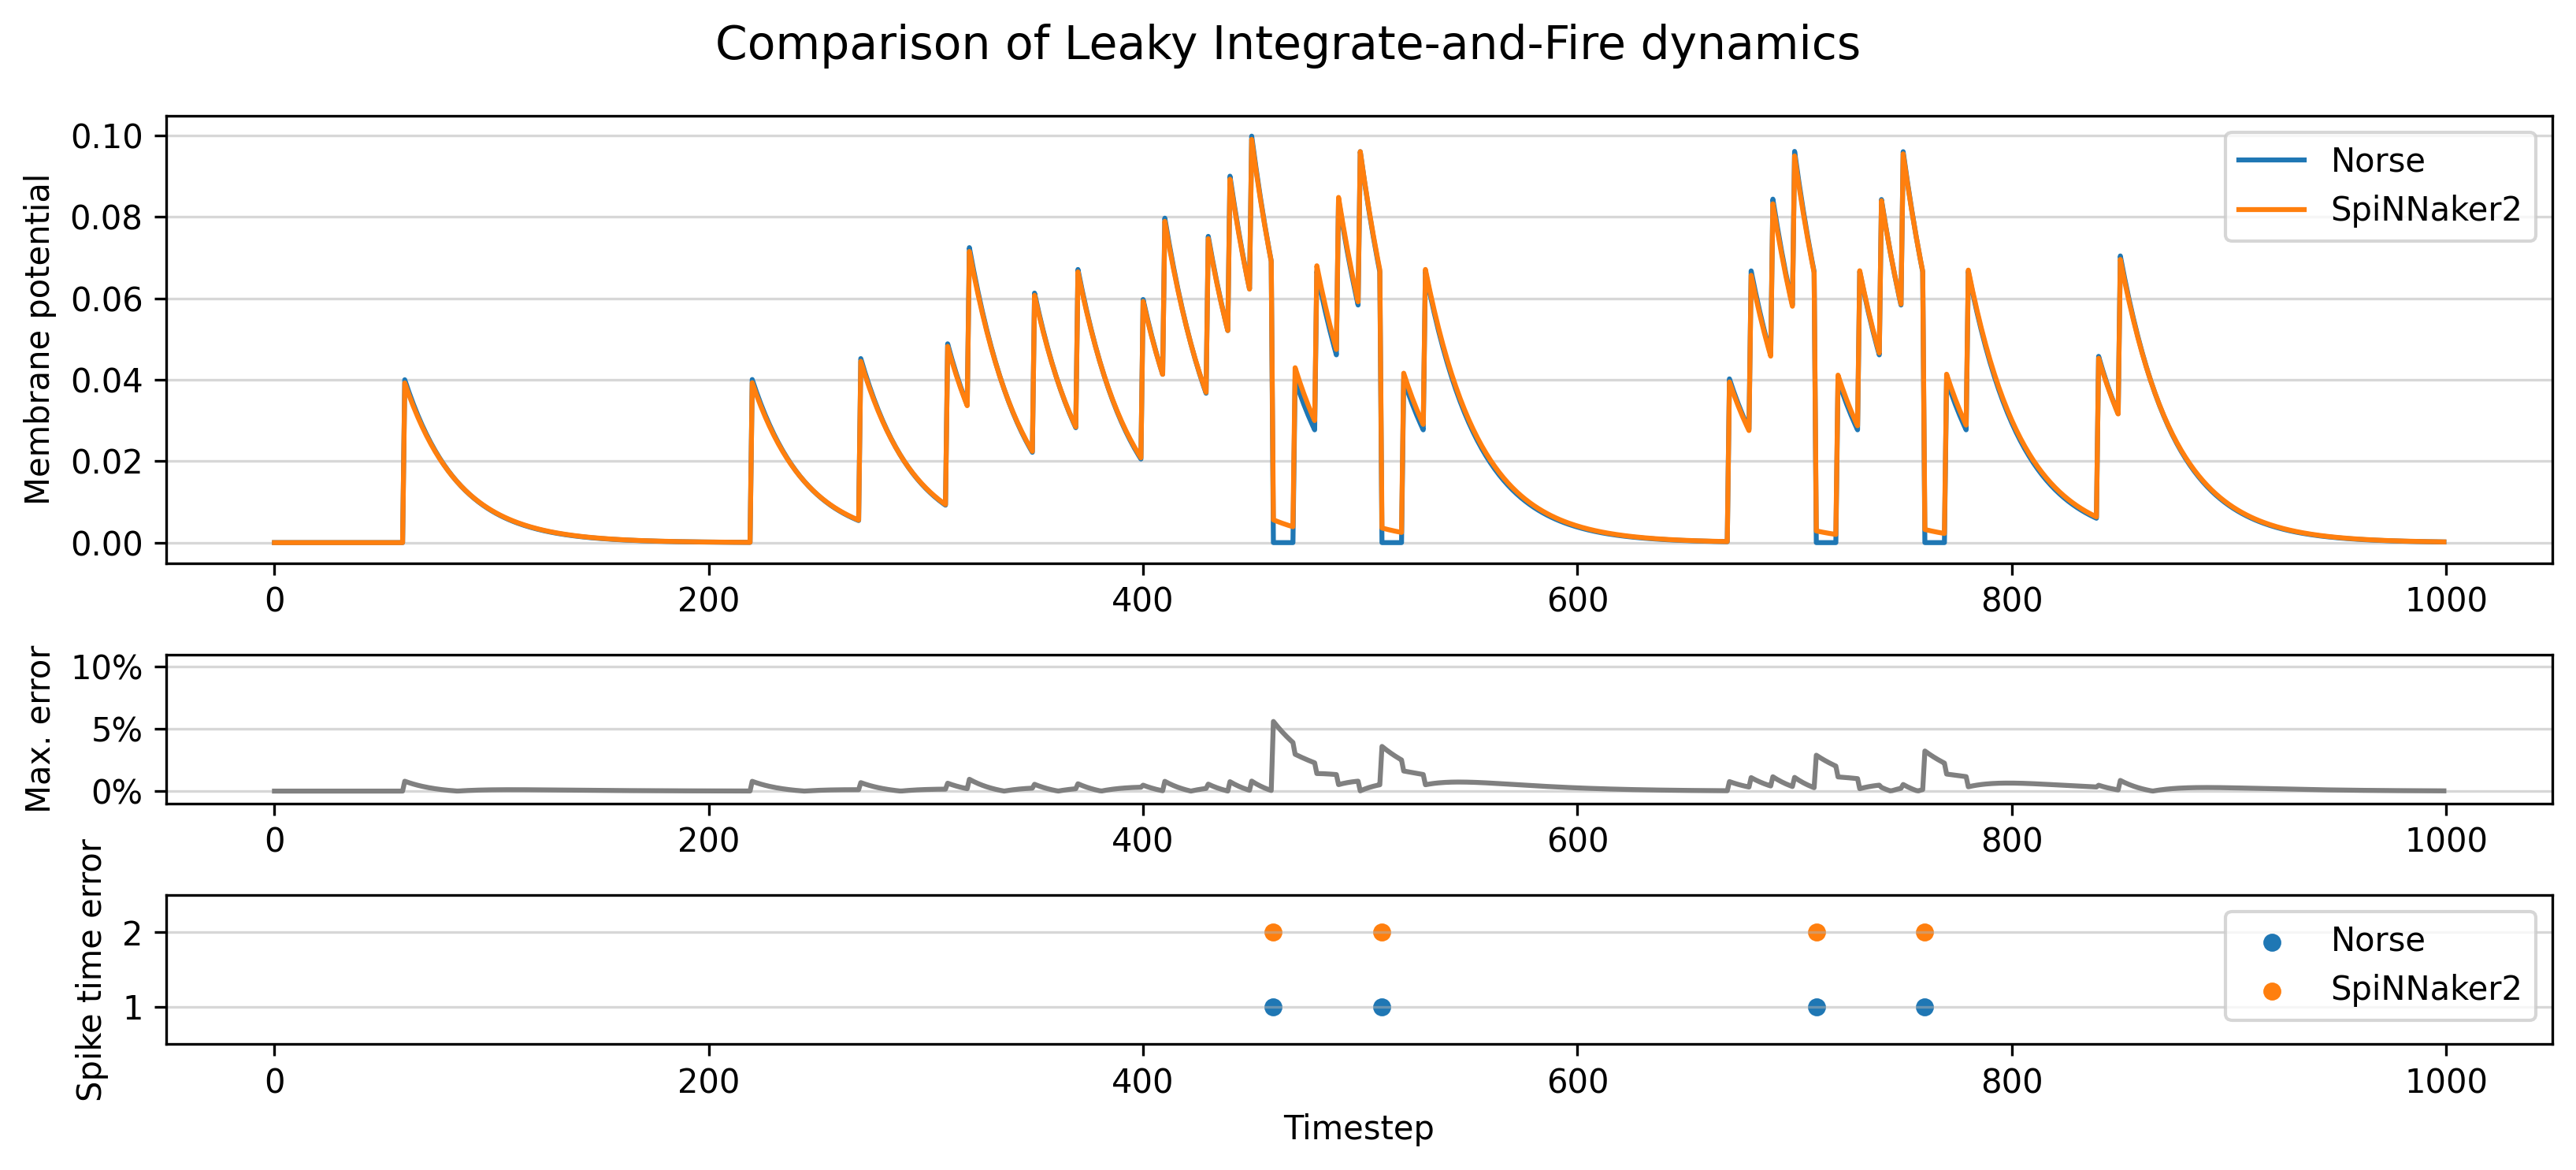

In [36]:
fig = plt.figure(figsize=(11, 5), dpi=300)
fig.suptitle('Comparison of Leaky Integrate-and-Fire dynamics', fontsize=14)
spec = mpl.gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[3, 1, 1])

ax1 = fig.add_subplot(spec[0])
ax1.plot(v_norse, label='Norse')
ax1.plot(v_spin, label='SpiNNaker2')
ax1.set_ylabel('Membrane potential')
ax1.legend()
ax1.grid(axis='y', alpha=0.5)

ax2 = fig.add_subplot(spec[1], sharex=ax1)
# TODO: make this the maximum difference between all traces
ax2.plot(abs(v_norse - v_spin) / v_norse.max(), c='gray')
ax2.set_ylabel('Max. error')
ax2.set_ylim(0-1e-2, 0.1+1e-2)
ax2.set_yticks([0, 0.05, 0.1])
ax2.set_yticklabels(['0%', '5%', '10%'])
ax2.grid(axis='y', alpha=0.5)

# TODO: visualize spike timing difference 
# (e.g. area of mismatch on the bottom of the plot)
ax3 = fig.add_subplot(spec[2], sharex=ax1)
ax3.set_ylabel('Spike time error')
ax3.scatter(st_norse, np.ones_like(st_norse), s=20, label='Norse')
ax3.scatter(st_spin, np.ones_like(st_spin) * 2., s=20, label='SpiNNaker2')
ax3.set_ylim(0.5, 2.5)
ax3.set_yticks([])
ax3.set_yticks([1, 2])
ax3.grid(axis='y', alpha=0.5)

ax3.legend()

ax3.set_xlabel('Timestep')

plt.tight_layout()
plt.show()

## 3D version

Still experimental, will need to stitch the graphics together manually because matplotlib doesn't want to scale 3D graphics properly..

In [3]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

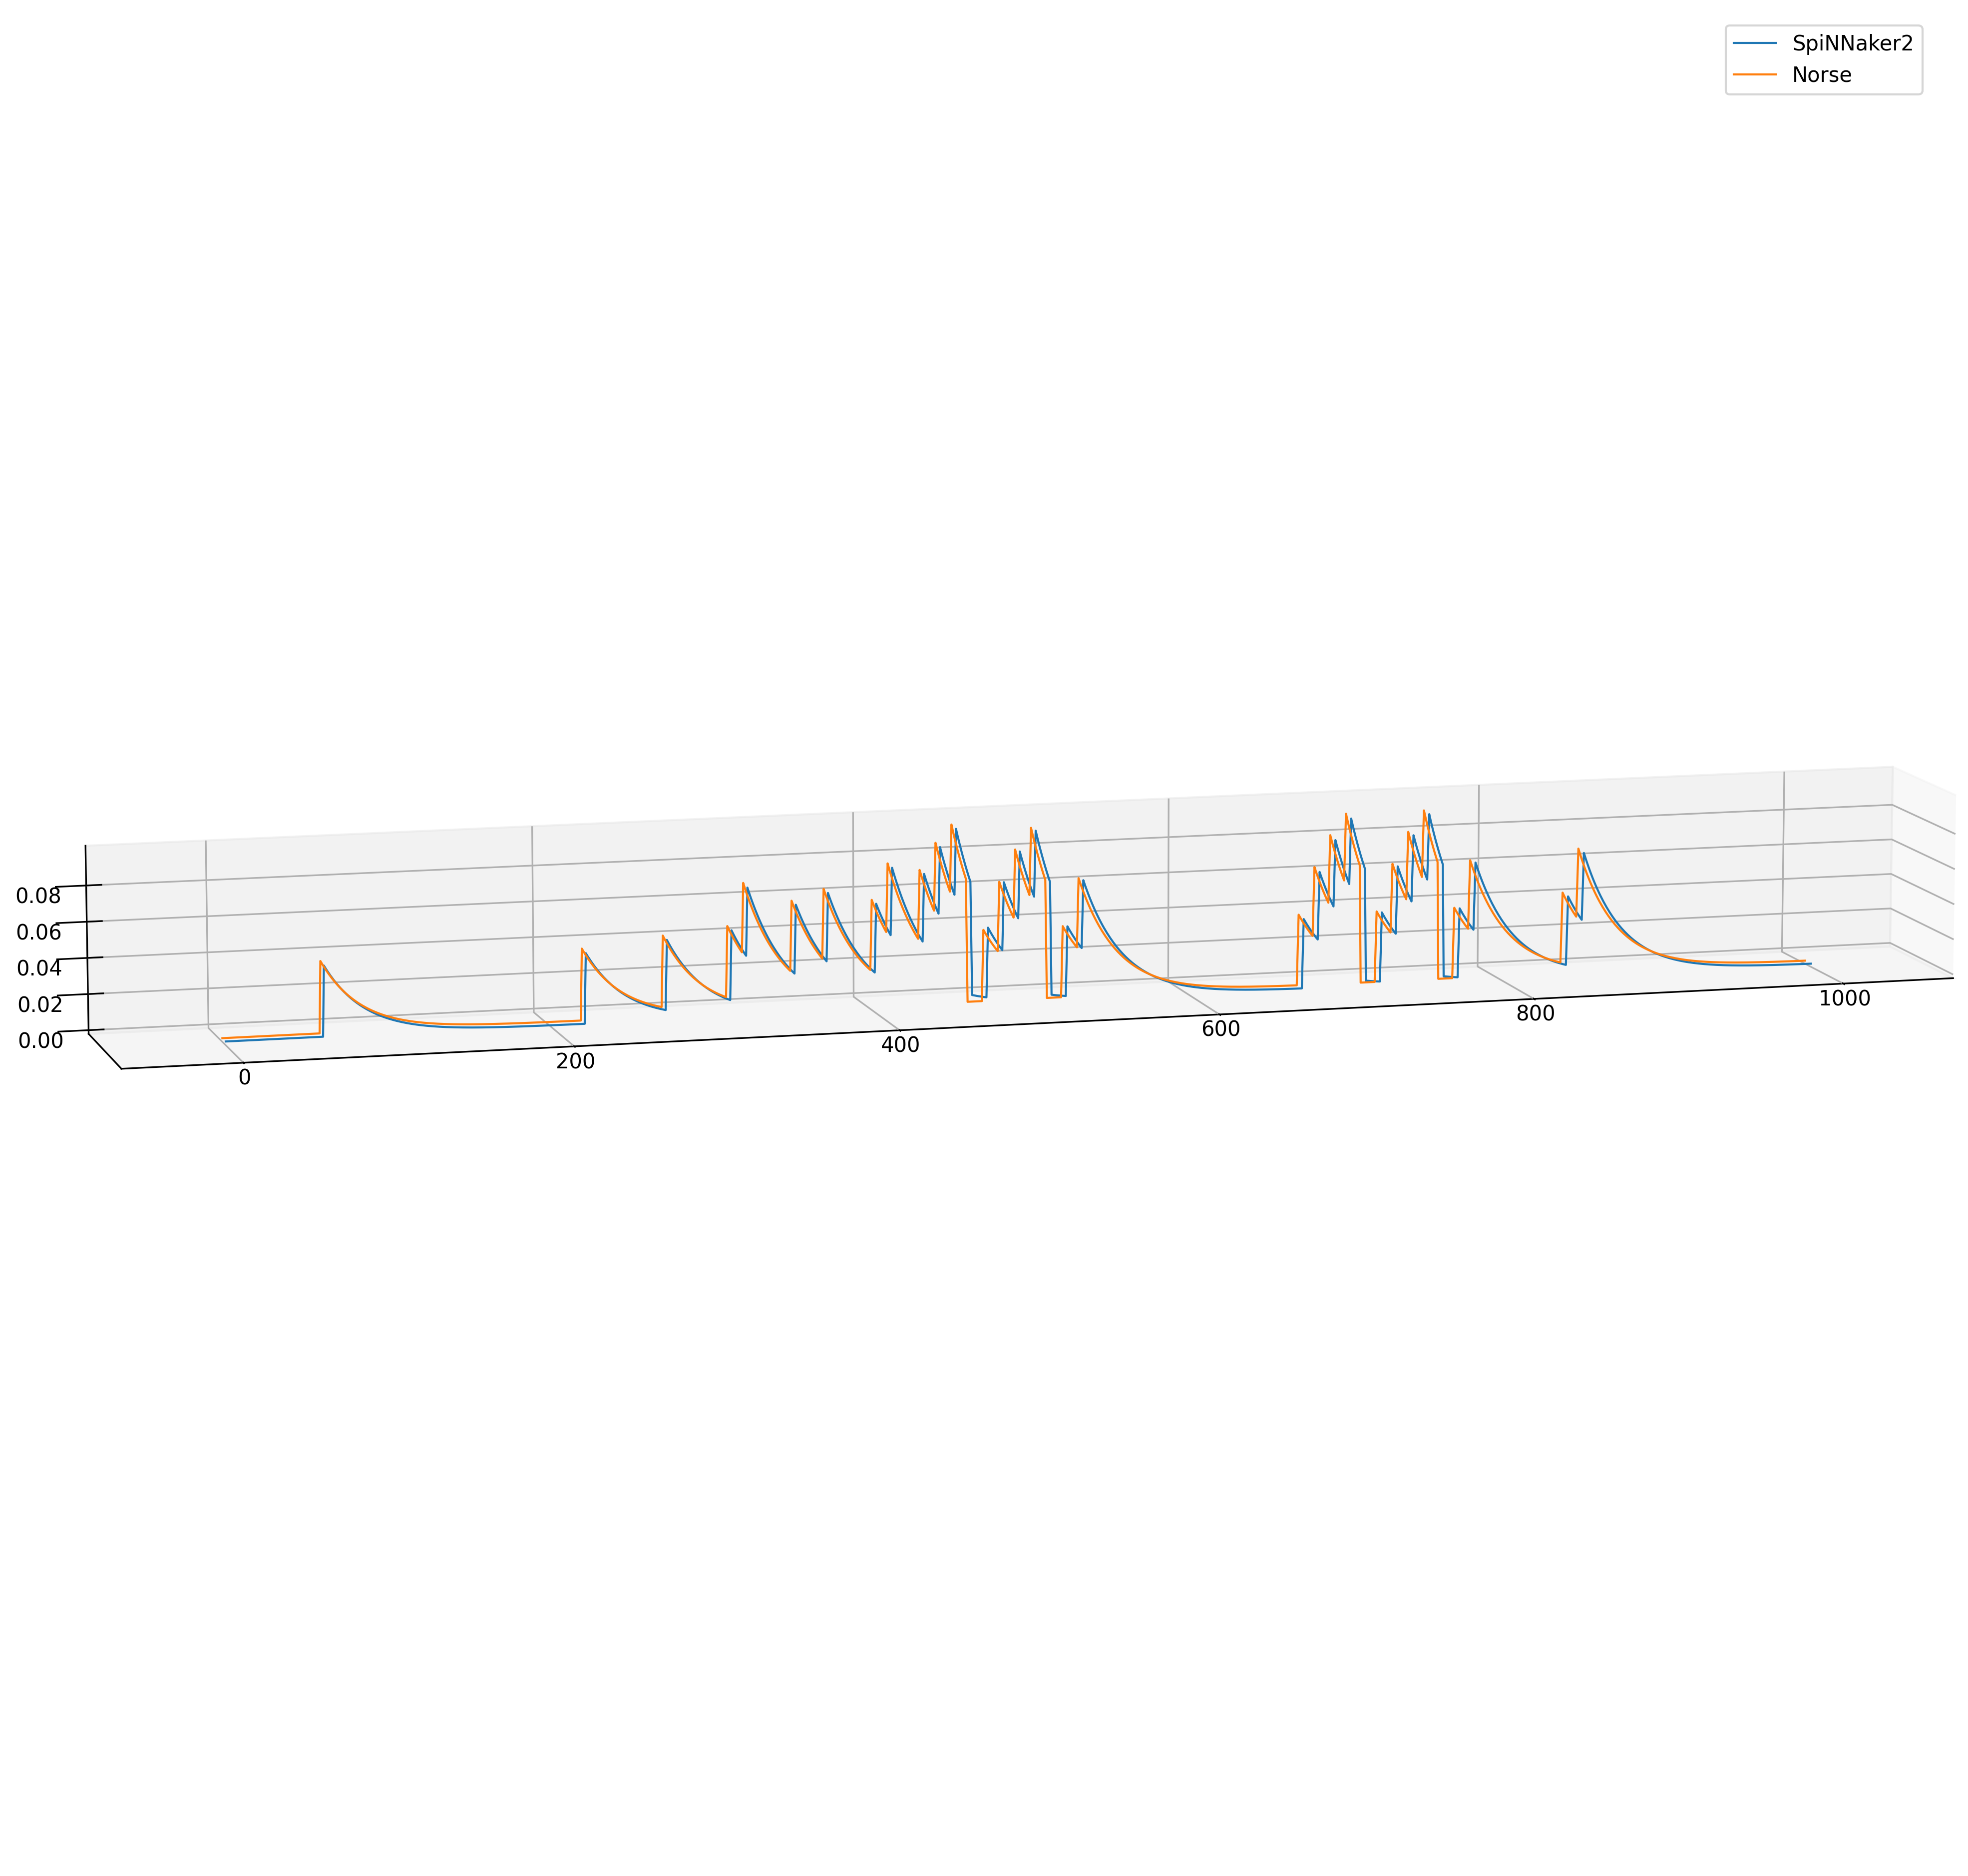

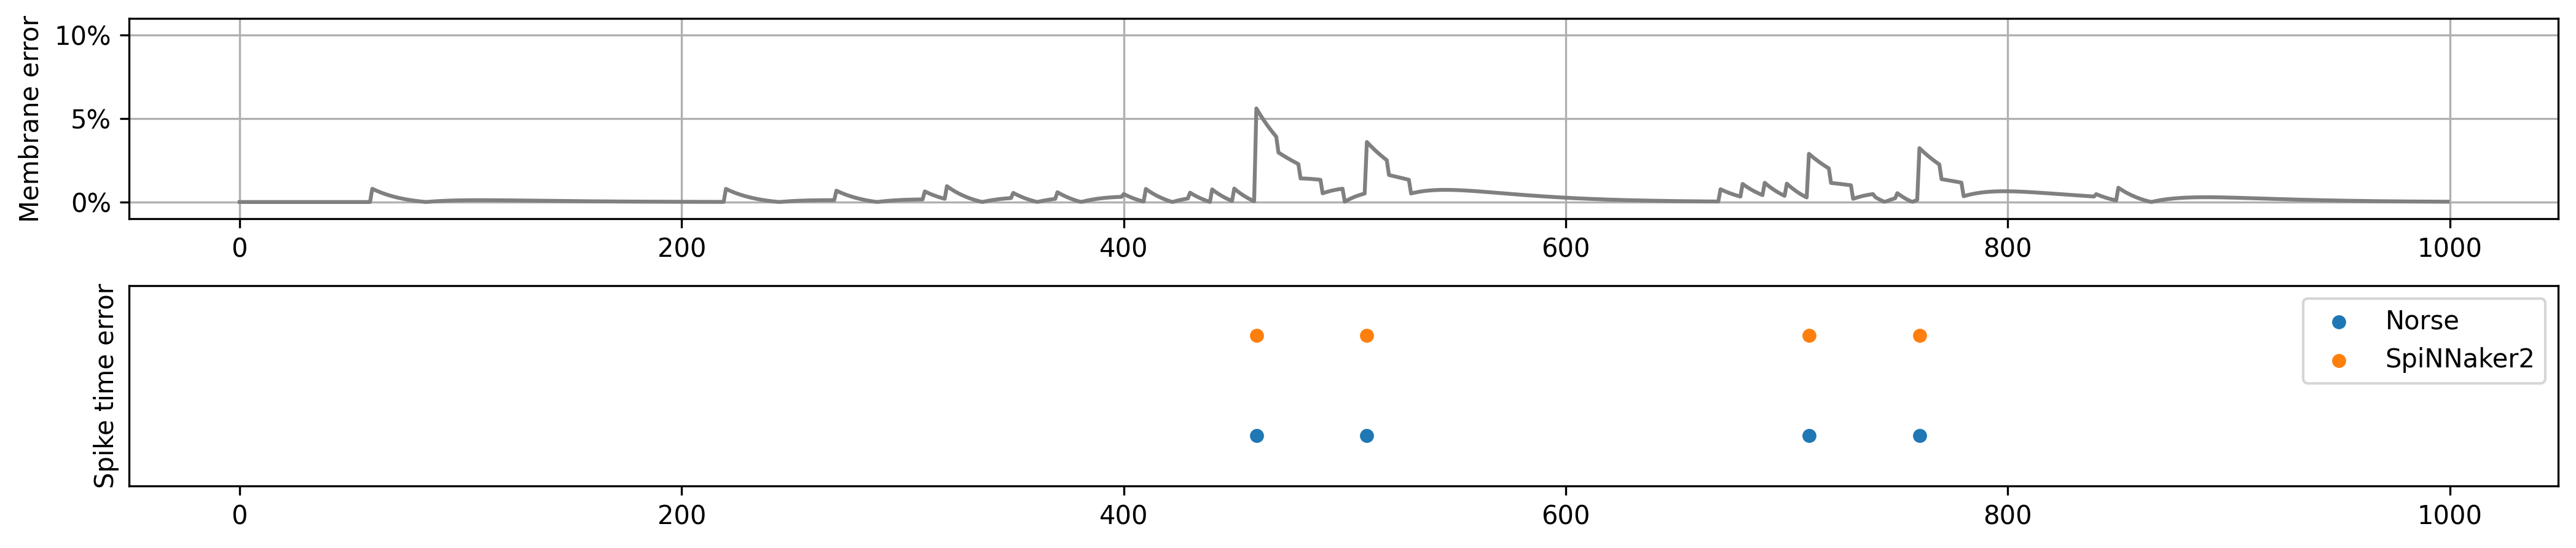

In [19]:
figsize = (17, 8)
fig = plt.figure(figsize=tuple(map(lambda x: 2*x, figsize)), dpi=300)
# fig = plt.figure(figsize=(17, 8), dpi=300)
spec = mpl.gridspec.GridSpec(ncols=1, nrows=1)
ax1 = fig.add_subplot(spec[0], projection='3d')
ax1.plot(np.arange(v_spin.shape[0]), np.ones_like(v_spin) * 0, v_spin, label='SpiNNaker2', lw=1)
ax1.plot(np.arange(v_norse.shape[0]), np.ones_like(v_norse) * 1., v_norse, label='Norse', lw=1)
ax1.set_box_aspect((10, 1, 1))
YLIM = 5
ax1.set_ylim(-YLIM, YLIM)
ax1.set_yticks([])
ax1.legend()
ax1.view_init(elev=10, azim=255, roll=0)

plt.show()
plt.close()

fig = plt.figure(figsize=(17, 8), dpi=300)
spec = mpl.gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[3, 1, 1])

ax2 = fig.add_subplot(spec[1], sharex=ax1)
ax2.plot(abs(v_norse - v_spin) / v_norse.max(), c='gray')
ax2.set_ylabel('Membrane error')
ax2.set_ylim(0-1e-2, 0.1+1e-2)
ax2.set_yticks([0, 0.05, 0.1])
ax2.set_yticklabels(['0%', '5%', '10%'])
ax2.grid()

# TODO: visualize spike timing difference 
# (e.g. area of mismatch on the bottom of the plot)
ax3 = fig.add_subplot(spec[2], sharex=ax1)
ax3.set_ylabel('Spike time error')
ax3.scatter(st_norse, np.ones_like(st_norse), s=20, label='Norse')
ax3.scatter(st_spin, np.ones_like(st_spin) * 2., s=20, label='SpiNNaker2')
ax3.set_ylim(0.5, 2.5)
ax3.set_yticks([])
ax3.legend()

plt.show()